In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

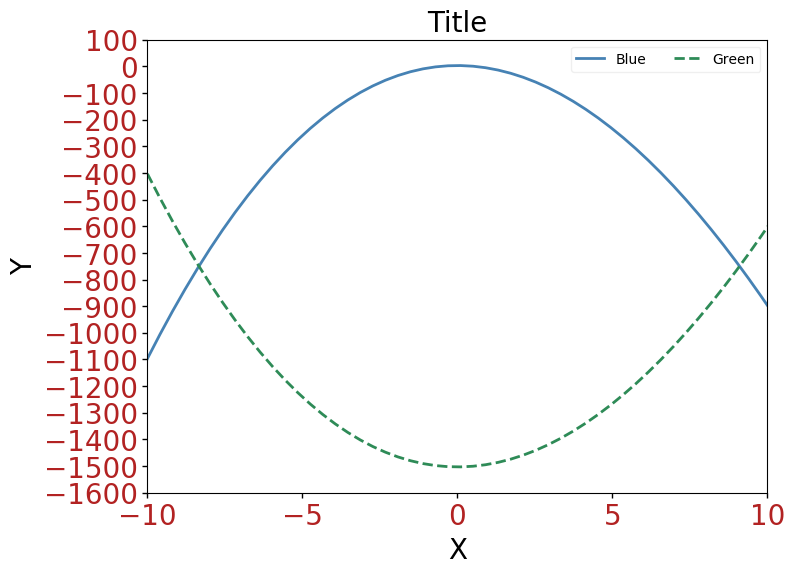

In [128]:
## 1. 简单画图示例：

####################
# 1.0 生成画图实验数据
###################

x = np.linspace(-10, 30, 100)  
y1 = 0.1*x**3 - 10*x**2 + np.pi
y2 = - y1-1500

##########
# 1.1 画图
##########
plt.figure(figsize=(8,6),dpi=100) # 设置画图大小和分辨率
l1, = plt.plot(x, y1, c='steelblue', linewidth=2.0, linestyle='-') 
l2, = plt.plot(x, y2, c='seagreen', linewidth=2.0, linestyle='--') 
 
# 更多设置参考： [plot参数设置](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
# 更多色彩设置： ![image](https://i.stack.imgur.com/k2VzI.png)

##########################
# 1.2 设置x,y轴取值范围和标签
##########################
plt.xlim((-10, 10))   # x取值范围
plt.ylim((-1500, 100))   # y取值范围
plt.xlabel('X',fontsize=20)  # x标签
plt.ylabel('Y',fontsize=20)  # y标签

##################
# 1.3 设置新的刻度点
##################
plt.xticks([-10,-5,0,5,10]) 
plt.yticks(np.linspace(-1600,100,18)) # 在[-1500,100]线性生成17个点
# 设置刻度点的一些属性，这里仅为了展示功能，视觉效果大家可以自己去尝试一下
plt.tick_params(labelcolor='firebrick', labelsize='20', width=1)
# 也可以把数字映射为字符串：
# plt.xticks([-10,-5,0,5,10],['S','M','L','XL','XXL']) 

#############
# 1.4 legend
#############
plt.legend(handles=[l1,l2],labels=['Blue','Green'],loc='best',prop={'size': 10},ncol=2,framealpha=0.3)

# # loc 参数：
# 'best' : 0,          
# 'upper right'  : 1,
# 'upper left'   : 2,
# 'lower left'   : 3,
# 'lower right'  : 4,
# 'right'        : 5,
# 'center left'  : 6,
# 'center right' : 7,
# 'lower center' : 8,
# 'upper center' : 9,
# 'center'       : 10

###########
# 1.5 title
###########
plt.title('Title',size=20)

##########
# 1.6 存图
##########
plt.savefig("test.png", dpi=100)

plt.show()

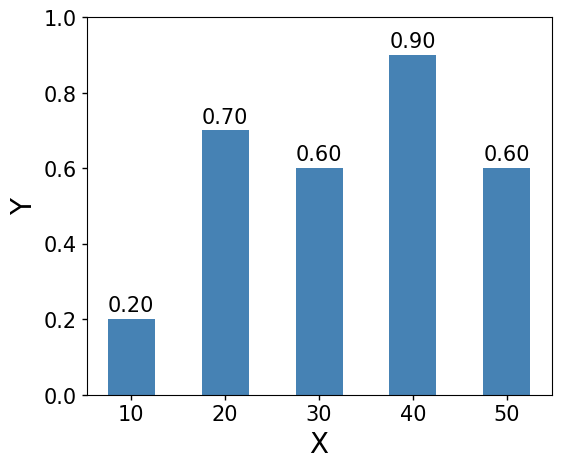

In [127]:
# 2. 柱状图示例：

x_bar = [10, 20, 30, 40, 50] 
y_bar = [0.2, 0.7, 0.6, 0.9, 0.6] 

# 画图：
plt.figure(figsize=(6,5),dpi=100) # 设置画图大小和分辨率
bars = plt.bar(x_bar, y_bar, color='steelblue', label=x_bar, width=5) 

# 在柱状图上标注数值：
for i, rec in enumerate(bars):
    x_text = rec.get_x()  # 获取柱形图横坐标 可以+/-数值使其居中
    y_text = rec.get_height() + 0.02 # 获取柱子的高度 +0.02
    plt.text(x_text, y_text, '%.2f' %y_bar[i], fontsize=15) # 标注文字

# 坐标轴设置：
plt.ylim((0, 1))   # y取值范围
plt.xlabel('X',fontsize=20)  # x标签
plt.ylabel('Y',fontsize=20)  # y标签
plt.tick_params(labelcolor='black', labelsize='15', width=1)
    
plt.show()

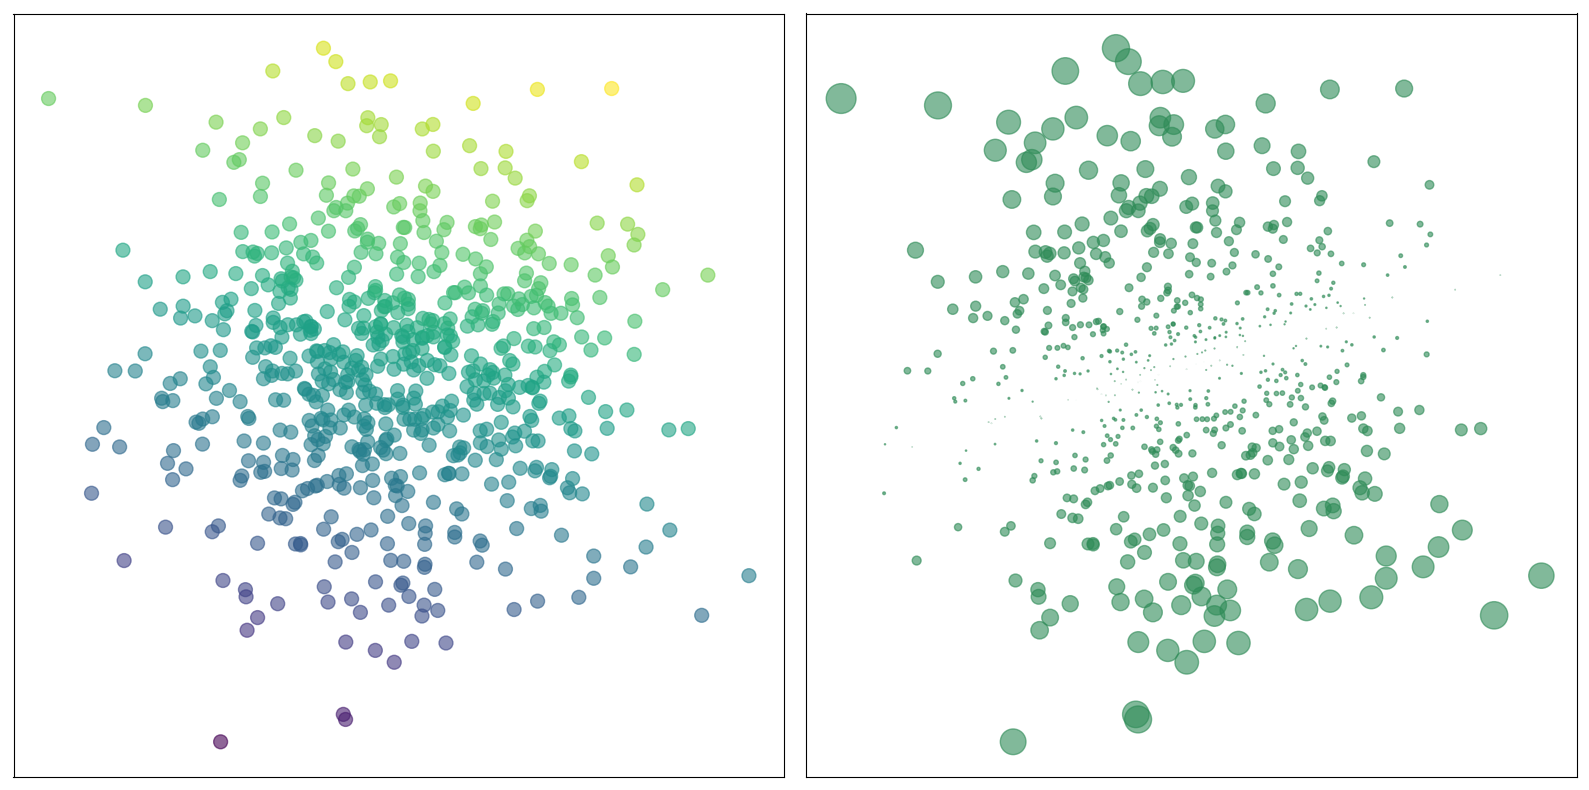

In [191]:
# 散点图与subplot：

plt.figure(figsize=(16,8), dpi=100) # 设置画图大小和分辨率

## 生成随机数：
X = np.random.normal(10, 20, 666)   # 正态分布 mean = 10, std = 20
Y = np.random.normal(6, 66, 666)     # 正态分布 mean = 6, std = 66

color = X + Y # 用颜色来区分散点的数值
size = ((X - Y)/10 + 0.001)**2 # 用大小来区分散点的数值

## 画图：
# subplot(行序号, 列序号, 图序号)
# plt.subplot(n_rows, n_cols, plot_num)

## subplot 1
plt.subplot(1, 2, 1)
plt.scatter(X, Y, s = 100, c = color, alpha=.6)
plt.xticks(())  # ignore xticks
plt.yticks(())  # ignore yticks
## subplot 2
plt.subplot(1, 2, 2)
plt.scatter(X, Y, s = size, c = 'seagreen',alpha=.6)
plt.xticks(())  # ignore xticks
plt.yticks(())  # ignore yticks

plt.tight_layout()
plt.show()

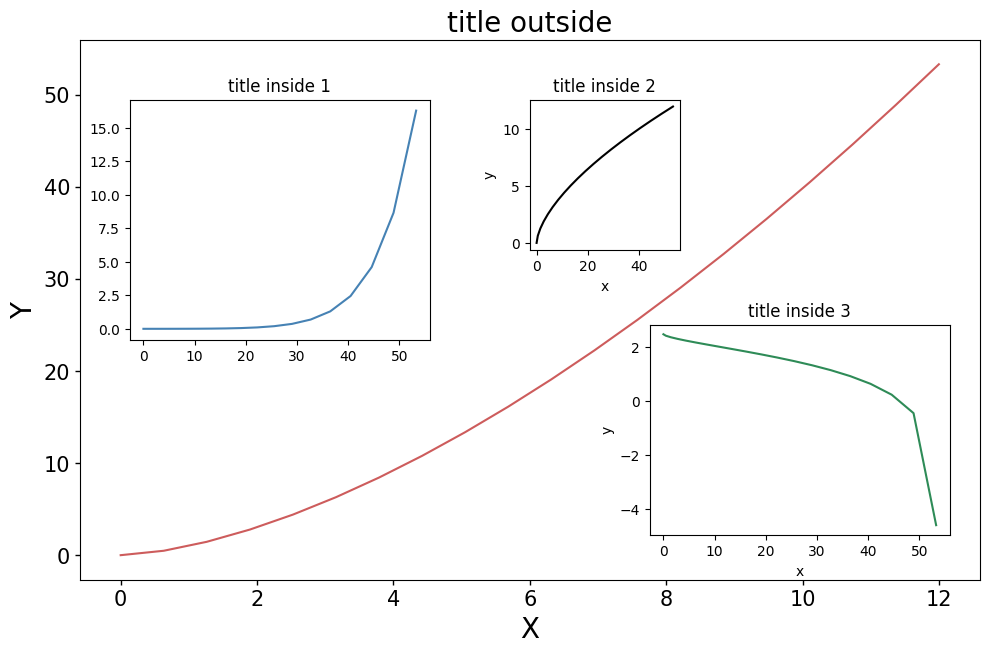

In [244]:
# 图中图：
fig = plt.figure(figsize=(10,6), dpi=100)

x = np.linspace(0,12,20)
y = x**1.6

left, bottom, width, height = 0.1, 0.1, 0.9, 0.9

## 外图
ax1 = fig.add_axes([left, bottom, width, height]) 
ax1.plot(x, y, 'indianred')
# 坐标轴及标题设置：
ax1.set_xlabel('X',fontsize=20)  # x标签
ax1.set_ylabel('Y',fontsize=20)  # y标签
ax1.tick_params(labelcolor='black', labelsize='15', width=1)
ax1.set_title('title outside',fontsize=20)

## 内图1
ax2 = fig.add_axes([0.15, 0.5, 0.3, 0.4])  
ax2.plot(y, np.exp(x)/10000, 'steelblue')
ax2.set_title('title inside 1')

## 内图2
ax3 = fig.add_axes([0.55, 0.65, 0.15, 0.25]) 
ax3.plot(y, x, 'black')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('title inside 2')

## 内图3
## 还可以用另一种方式添加子图：
plt.axes([0.67, 0.175, 0.3, 0.35])
plt.plot(y[::-1], np.log(x+0.01), 'seagreen')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 3')

plt.show()

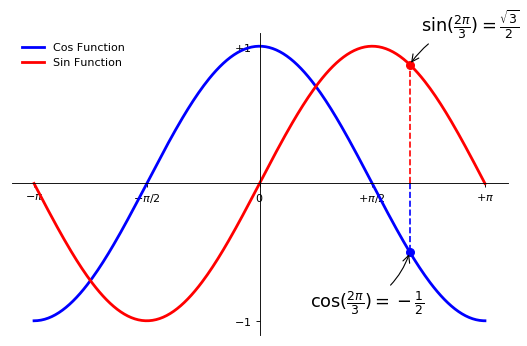

In [246]:
# 一个栗子：

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="Cos Function")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label="Sin Function")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)],
         color='blue', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t], [0, np.sin(t)],
         color='red', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.sin(t), ], 50, color='red')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left', frameon=False)
plt.show()


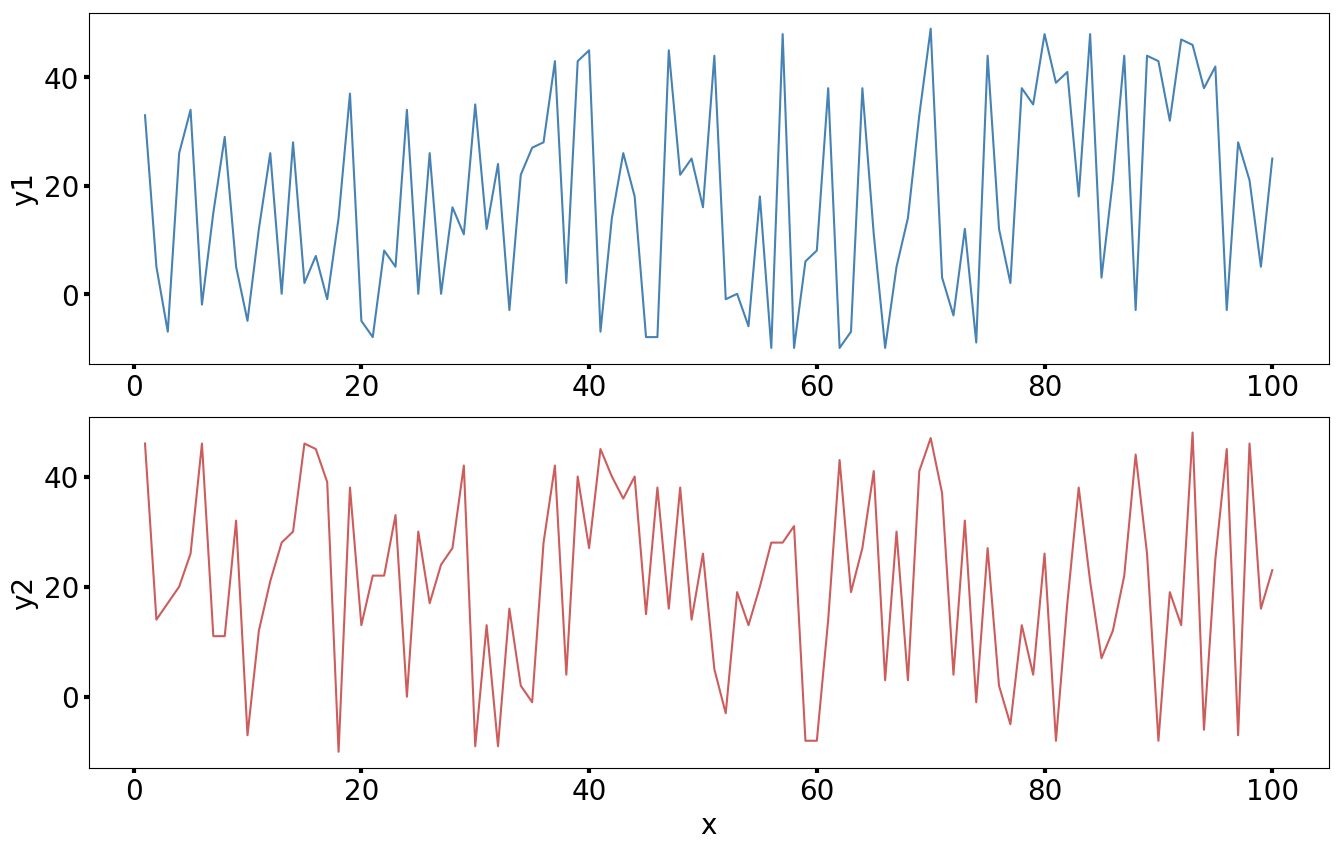

In [251]:
##### 常用的plot ######

x = np.linspace(1,100,100)

y1 = np.random.randint(-10,50,(100,))
y2 = np.random.randint(-10,50,(100,))

fig = plt.figure(figsize=(16,10),dpi=100)
ax1 = fig.add_subplot(211)

l1,=ax1.plot(x,y1, c='steelblue', label='y1')
ax1.tick_params(labelcolor='k', labelsize='20', width=3)
ax1.set_ylabel("y1",fontsize=20)

ax2 = fig.add_subplot(212)
l1,=ax2.plot(x,y2, c='indianred', label='y2')
ax2.tick_params(labelcolor='k', labelsize='20', width=3)
ax2.set_xlabel("x",fontsize=20)
ax2.set_ylabel("y2",fontsize=20)
plt.subplots_adjust(hspace =0.15)
plt.show()

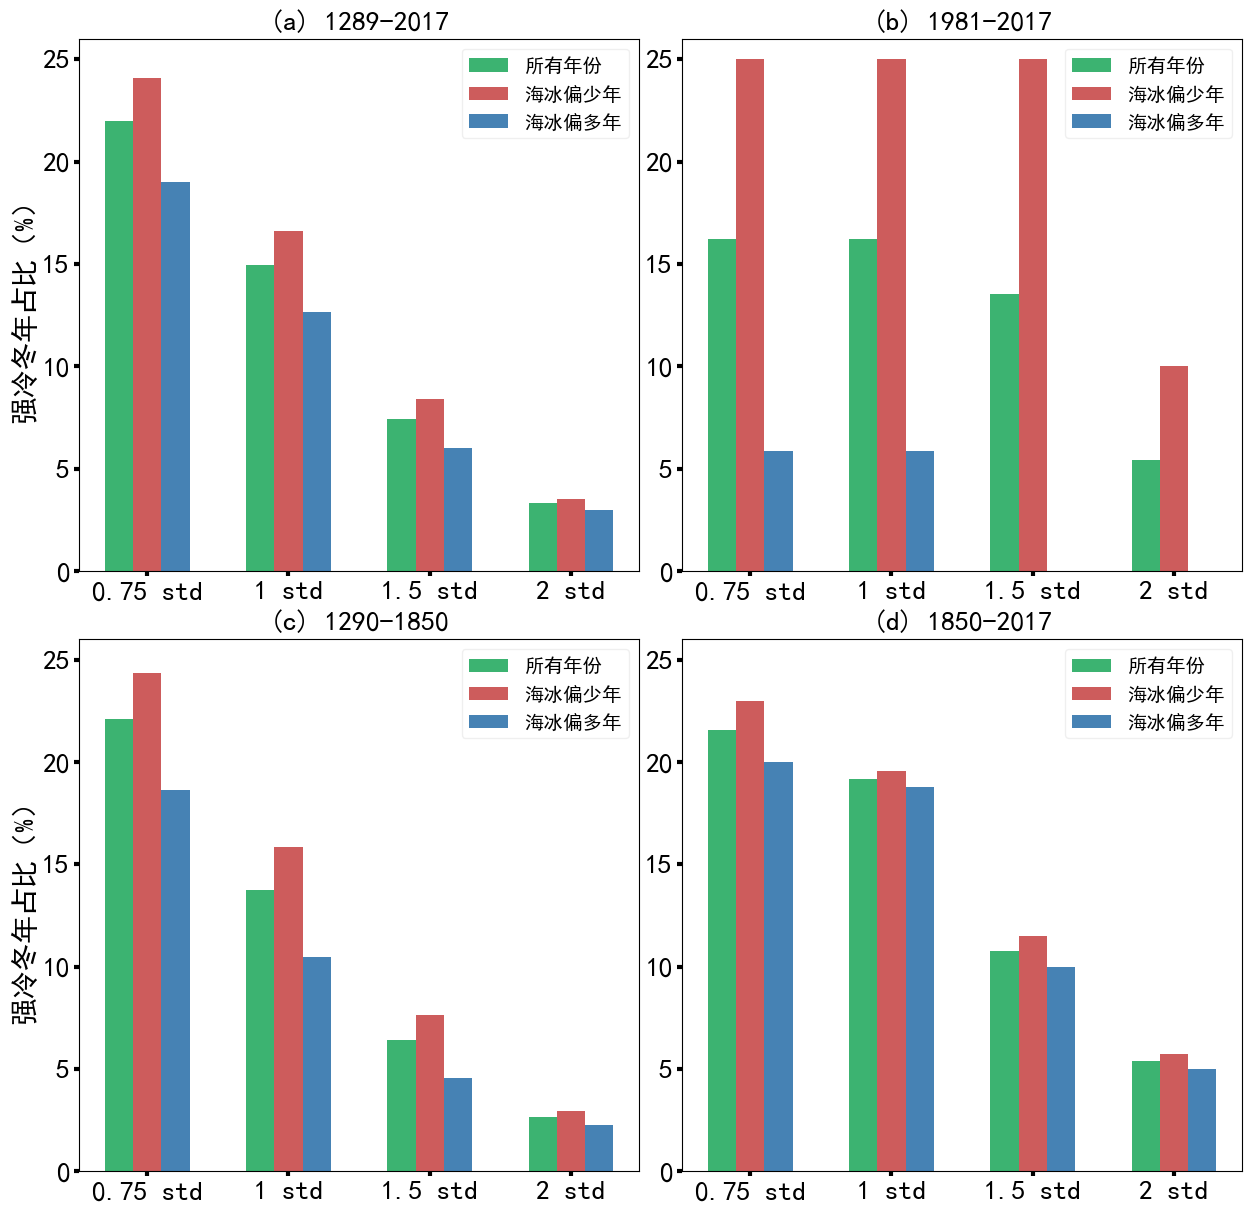

In [3]:
##### 毕业论文中的一张图，供参考 ######

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

### Data:
#1290-2017
a1=(21.98, 14.97, 7.42, 3.30)
a2=(24.07, 16.59, 8.41, 3.50)
a3=(19.,   12.67, 6.,   3.  )
#1290-1850
b1=(22.10,  13.73,  6.42,  2.67)
b2=(24.34,  15.84,  7.62,  2.93)
b3=(18.64,  10.45,  4.55,  2.27)
#1850-2017
c1=(21.56,  19.16,  10.78,  5.39)
c2=(22.99,  19.54 , 11.49,  5.75)
c3=(20.  ,  18.75,  10.  ,  5.  )
#1981-2017
d1=(16.22, 16.22,  13.51,  5.41)
d2=(25.,   25., 25.,  10.)
d3=(5.88,  5.88, 0.,  0.)

### Plot:
ind = np.arange(4)  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots(2,2,figsize=(15, 15),dpi=100)

rects1 = ax[0,0].bar(ind - 0.2, a1, width, color='mediumseagreen', label='所有年份')
rects2 = ax[0,0].bar(ind , a2, width, color='IndianRed', label='海冰偏少年')
rects3 = ax[0,0].bar(ind + 0.2, a3, width, color='steelblue', label='海冰偏多年')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0,0].set_ylabel(u'强冷冬年占比（%）',fontsize=20)
ax[0,0].set_title('(a) 1289-2017',fontsize=20)
ax[0,0].set_xticks(ind)
ax[0,0].set_xticklabels(('0.75 std', '1 std', '1.5 std', '2 std'),fontsize=20)
ax[0,0].legend(loc=0,prop={'size': 14},framealpha=0.3)
ax[0,0].tick_params(labelcolor='k', labelsize='20', width=3)
ax[0,0].set_ylim(0,26)

rects1 = ax[0,1].bar(ind - 0.2, d1, width, color='mediumseagreen', label='所有年份')
rects2 = ax[0,1].bar(ind , d2, width, color='IndianRed', label='海冰偏少年')
rects3 = ax[0,1].bar(ind + 0.2, d3, width, color='steelblue', label='海冰偏多年')
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax[0,1].set_ylabel(u'强冷冬年占比（%）',fontsize=20)
ax[0,1].set_title('(b) 1981-2017',fontsize=20)
ax[0,1].set_xticks(ind)
ax[0,1].set_xticklabels(('0.75 std', '1 std', '1.5 std', '2 std'),fontsize=20)
ax[0,1].legend(loc=0,prop={'size': 14},framealpha=0.3)
ax[0,1].tick_params(labelcolor='k', labelsize='20', width=3)
ax[0,1].set_ylim(0,26)

rects1 = ax[1,0].bar(ind - 0.2, b1, width, color='mediumseagreen', label='所有年份')
rects2 = ax[1,0].bar(ind , b2, width, color='IndianRed', label='海冰偏少年')
rects3 = ax[1,0].bar(ind + 0.2, b3, width, color='steelblue', label='海冰偏多年')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1,0].set_ylabel(u'强冷冬年占比（%）',fontsize=20)
ax[1,0].set_title('(c) 1290-1850',fontsize=20)
ax[1,0].set_xticks(ind)
ax[1,0].set_xticklabels(('0.75 std', '1 std', '1.5 std', '2 std'),fontsize=20)
ax[1,0].legend(loc=0,prop={'size': 14},framealpha=0.3)
ax[1,0].tick_params(labelcolor='k', labelsize='20', width=3)
ax[1,0].set_ylim(0,26)

rects1 = ax[1,1].bar(ind - 0.2, c1, width, color='mediumseagreen', label='所有年份')
rects2 = ax[1,1].bar(ind , c2, width, color='IndianRed', label='海冰偏少年')
rects3 = ax[1,1].bar(ind + 0.2, c3, width, color='steelblue', label='海冰偏多年')
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax[3].set_ylabel(u'强冷冬年占比（%）',fontsize=20)
ax[1,1].set_title('(d) 1850-2017',fontsize=20)
ax[1,1].set_xticks(ind)
ax[1,1].set_xticklabels(('0.75 std', '1 std', '1.5 std', '2 std'),fontsize=20)
ax[1,1].legend(loc=0,prop={'size': 14},framealpha=0.3)
ax[1,1].tick_params(labelcolor='k', labelsize='20', width=3)
ax[1,1].set_ylim(0,26)
# ax[1,1].set_yticks([-1,0,1])

plt.subplots_adjust(hspace =0.128)
plt.subplots_adjust(wspace =0.078)
plt.show()